In [7]:
# csv 읽어오기
import pandas as pd
df_white = pd.read_csv('winequality-white.csv')
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


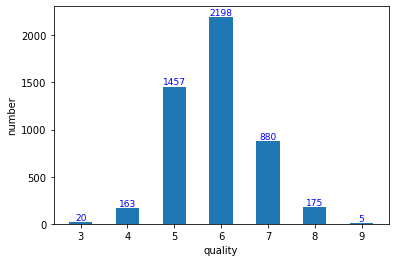

In [8]:
# barplot(count number per quality)

import matplotlib.pyplot as plt
y_axis = [0,0,0,0,0,0,0]
x_range = range(3,10)
for i in range(len(df_white['quality'])):
    if df_white['quality'][i] == 3:
        y_axis[0] += 1
    elif df_white['quality'][i] == 4:
        y_axis[1] += 1
    elif df_white['quality'][i] == 5:
        y_axis[2] += 1
    elif df_white['quality'][i] == 6:
        y_axis[3] += 1
    elif df_white['quality'][i] == 7:
        y_axis[4] += 1
    elif df_white['quality'][i] == 8:
        y_axis[5] += 1
    elif df_white['quality'][i] == 9:
        y_axis[6] += 1    
    else:
        break

plt.bar(x_range, y_axis, width = 0.5)
for i, v in enumerate(x_range):
    plt.text(v, y_axis[i], y_axis[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
plt.xlabel('quality')
plt.ylabel('number')
plt.show()


In [11]:
# 'quality' 요약
df_white['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [12]:
import numpy as np
quality_statistic = [0,0,0,0,0,0,0,0] # count, mean, std, min, q1, q2, q3, max 순서
name = ['count', 'mean', 'std', 'min', 'q1', 'q2', 'q3', 'max']
quality_statistic[0] = len(df_white['quality'])
quality_statistic[1] = np.mean(df_white['quality'])
quality_statistic[2] = np.std(df_white['quality'])
quality_statistic[3] = df_white['quality'].quantile(0)
quality_statistic[4] = df_white['quality'].quantile(.25)
quality_statistic[5] = df_white['quality'].quantile(.5)
quality_statistic[6] = df_white['quality'].quantile(.75)
quality_statistic[7] = df_white['quality'].quantile(1)
for i in range(len(quality_statistic)):
    print(name[i] + ':', quality_statistic[i])

count: 4898
mean: 5.87790935075541
std: 0.8855481621683685
min: 3.0
q1: 5.0
q2: 6.0
q3: 6.0
max: 9.0


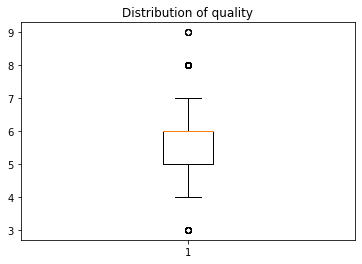

In [14]:
# box plot
plt.boxplot(df_white['quality'])
plt.title('Distribution of quality')
plt.show()

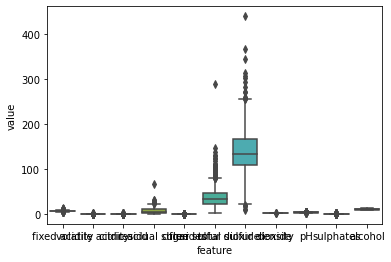

<Figure size 864x216 with 0 Axes>

In [15]:
import seaborn as sns
col_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
data = []
section = ['fixed acidity']*4898+['volatile acidity']*4898+['citric acid']*4898+['residual sugar']*4898+['chlorides']*4898+['free sulfur dioxide']*4898+['total sulfur dioxide']*4898+['density']*4898+['pH']*4898+['sulphates']*4898+['alcohol']*4898
for i in range(11):
    for j in range(4898):
        data.append(df_white.iloc[j,i])
aa = pd.DataFrame(data)
aa.insert(0,'section',section)
aa.columns = ['feature','value']
sns.boxplot(x="feature",y="value",data=aa)
plt.figure(figsize=(12,3))
plt.show()



In [18]:
# min-max normalization
from sklearn.preprocessing import MinMaxScaler
df_normalized = df_white.drop(['quality'],axis='columns')
scaler = MinMaxScaler()
df_normalized[:] = scaler.fit_transform(df_normalized[:])
df_normalized['quality'] = df_white['quality']
df_white = df_normalized
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,6
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,6
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,6
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,6
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,5
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,6
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,7


In [19]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
'''
x_data = df_red[['fixed acidity', 'volatile acidity', 'residual sugar',
       'free sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
target = df_red[['quality']]
ridge = Ridge().fit(x_data, target)
y_pred = ridge.predict(x_data)
r2 = r2_score(df_red['quality'],y_pred)
r2
'''


"\nx_data = df_red[['fixed acidity', 'volatile acidity', 'residual sugar',\n       'free sulfur dioxide', 'density',\n       'pH', 'sulphates', 'alcohol']]\ntarget = df_red[['quality']]\nridge = Ridge().fit(x_data, target)\ny_pred = ridge.predict(x_data)\nr2 = r2_score(df_red['quality'],y_pred)\nr2\n"

In [23]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
x_data = df_white.drop(['quality'], axis=1)
target = df_white[['quality']]
clf =svm.SVC(kernel = 'rbf')
clf = clf.fit(x_data, target)
y_pred = clf.predict(x_data)
r2 = r2_score(df_white['quality'],y_pred)
r2

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.23691544135469367

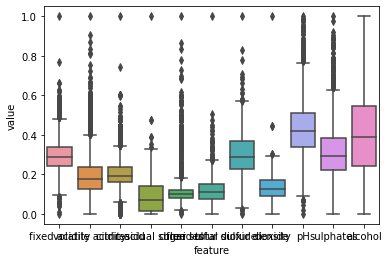

<Figure size 864x216 with 0 Axes>

In [25]:
col_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
data = []
section = ['fixed acidity']*4898+['volatile acidity']*4898+['citric acid']*4898+['residual sugar']*4898+['chlorides']*4898+['free sulfur dioxide']*4898+['total sulfur dioxide']*4898+['density']*4898+['pH']*4898+['sulphates']*4898+['alcohol']*4898
for i in range(11):
    for j in range(4898):
        data.append(df_white.iloc[j,i])
aa = pd.DataFrame(data)
aa.insert(0,'section',section)
aa.columns = ['feature','value']
sns.boxplot(x="feature",y="value",data=aa)
plt.figure(figsize=(12,3))
plt.show()

In [30]:
df_white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [33]:
x_data = df_white.drop(['quality'], axis=1)
target = df_white[['quality']]

In [34]:
import numpy as np
import statsmodels.api as sm
# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:26:16   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.5509      0.107     51.650      0.000       5.340       5.762
fixed acidity            0.6814      0.217      3.139      0.002       0.256       1.107
volatile acidity        -1.9004      0.116    -16.373      0.000      -2.128      -1.673
citric acid              0.0367      0.159      0.231      0.818      -0.275       0.348
residual sugar           5.3127      0.491     10.825      0.000       4.351       6.275
chlorides               -0.0833      0.184     -0.452      0.651      -0.444       0.278
free sulfur dioxide      1.0713      0.242      4.422      0.000       0.596       1.546
total sulfur dioxide    -0.1232      0.163     -0.756      0.450      -0.443       0.196
density                 -7.7952      0.989     -7.879      0.000      -9.735      -5.856
pH                       0.7550      0.116      6.513      0.000       0.528       0.982
sulphates                0.5431      0.086      6.291      0.000       0.374       0.712
alcohol                  1.1995      0.150      7.988      0.000       0.905       1.494
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
y = fitted_multi_model.params[1:]

In [36]:
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032,6
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935,6
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710,6
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,0.230769,0.127451,0.174699,0.015337,0.089021,0.076655,0.192575,0.077694,0.500000,0.325581,0.516129,6
4894,0.269231,0.235294,0.216867,0.113497,0.112760,0.191638,0.368910,0.150183,0.390909,0.279070,0.258065,5
4895,0.259615,0.156863,0.114458,0.009202,0.094955,0.097561,0.236659,0.104685,0.245455,0.279070,0.225806,6
4896,0.163462,0.205882,0.180723,0.007669,0.038576,0.062718,0.234339,0.030461,0.563636,0.186047,0.774194,7


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


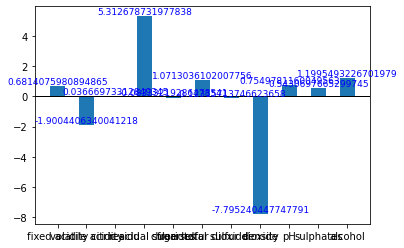

In [40]:
x_range = df_white.columns[:len(df_white.columns)-1]
y_ = [y[0],y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10]]
print(x_range)
plt.axhline(y=0.0, color='k', linewidth=1)
plt.bar(x_range, y_, width = 0.5)
for i, v in enumerate(x_range):
    plt.text(v, y_[i], y_[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 9, 
             color='blue',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

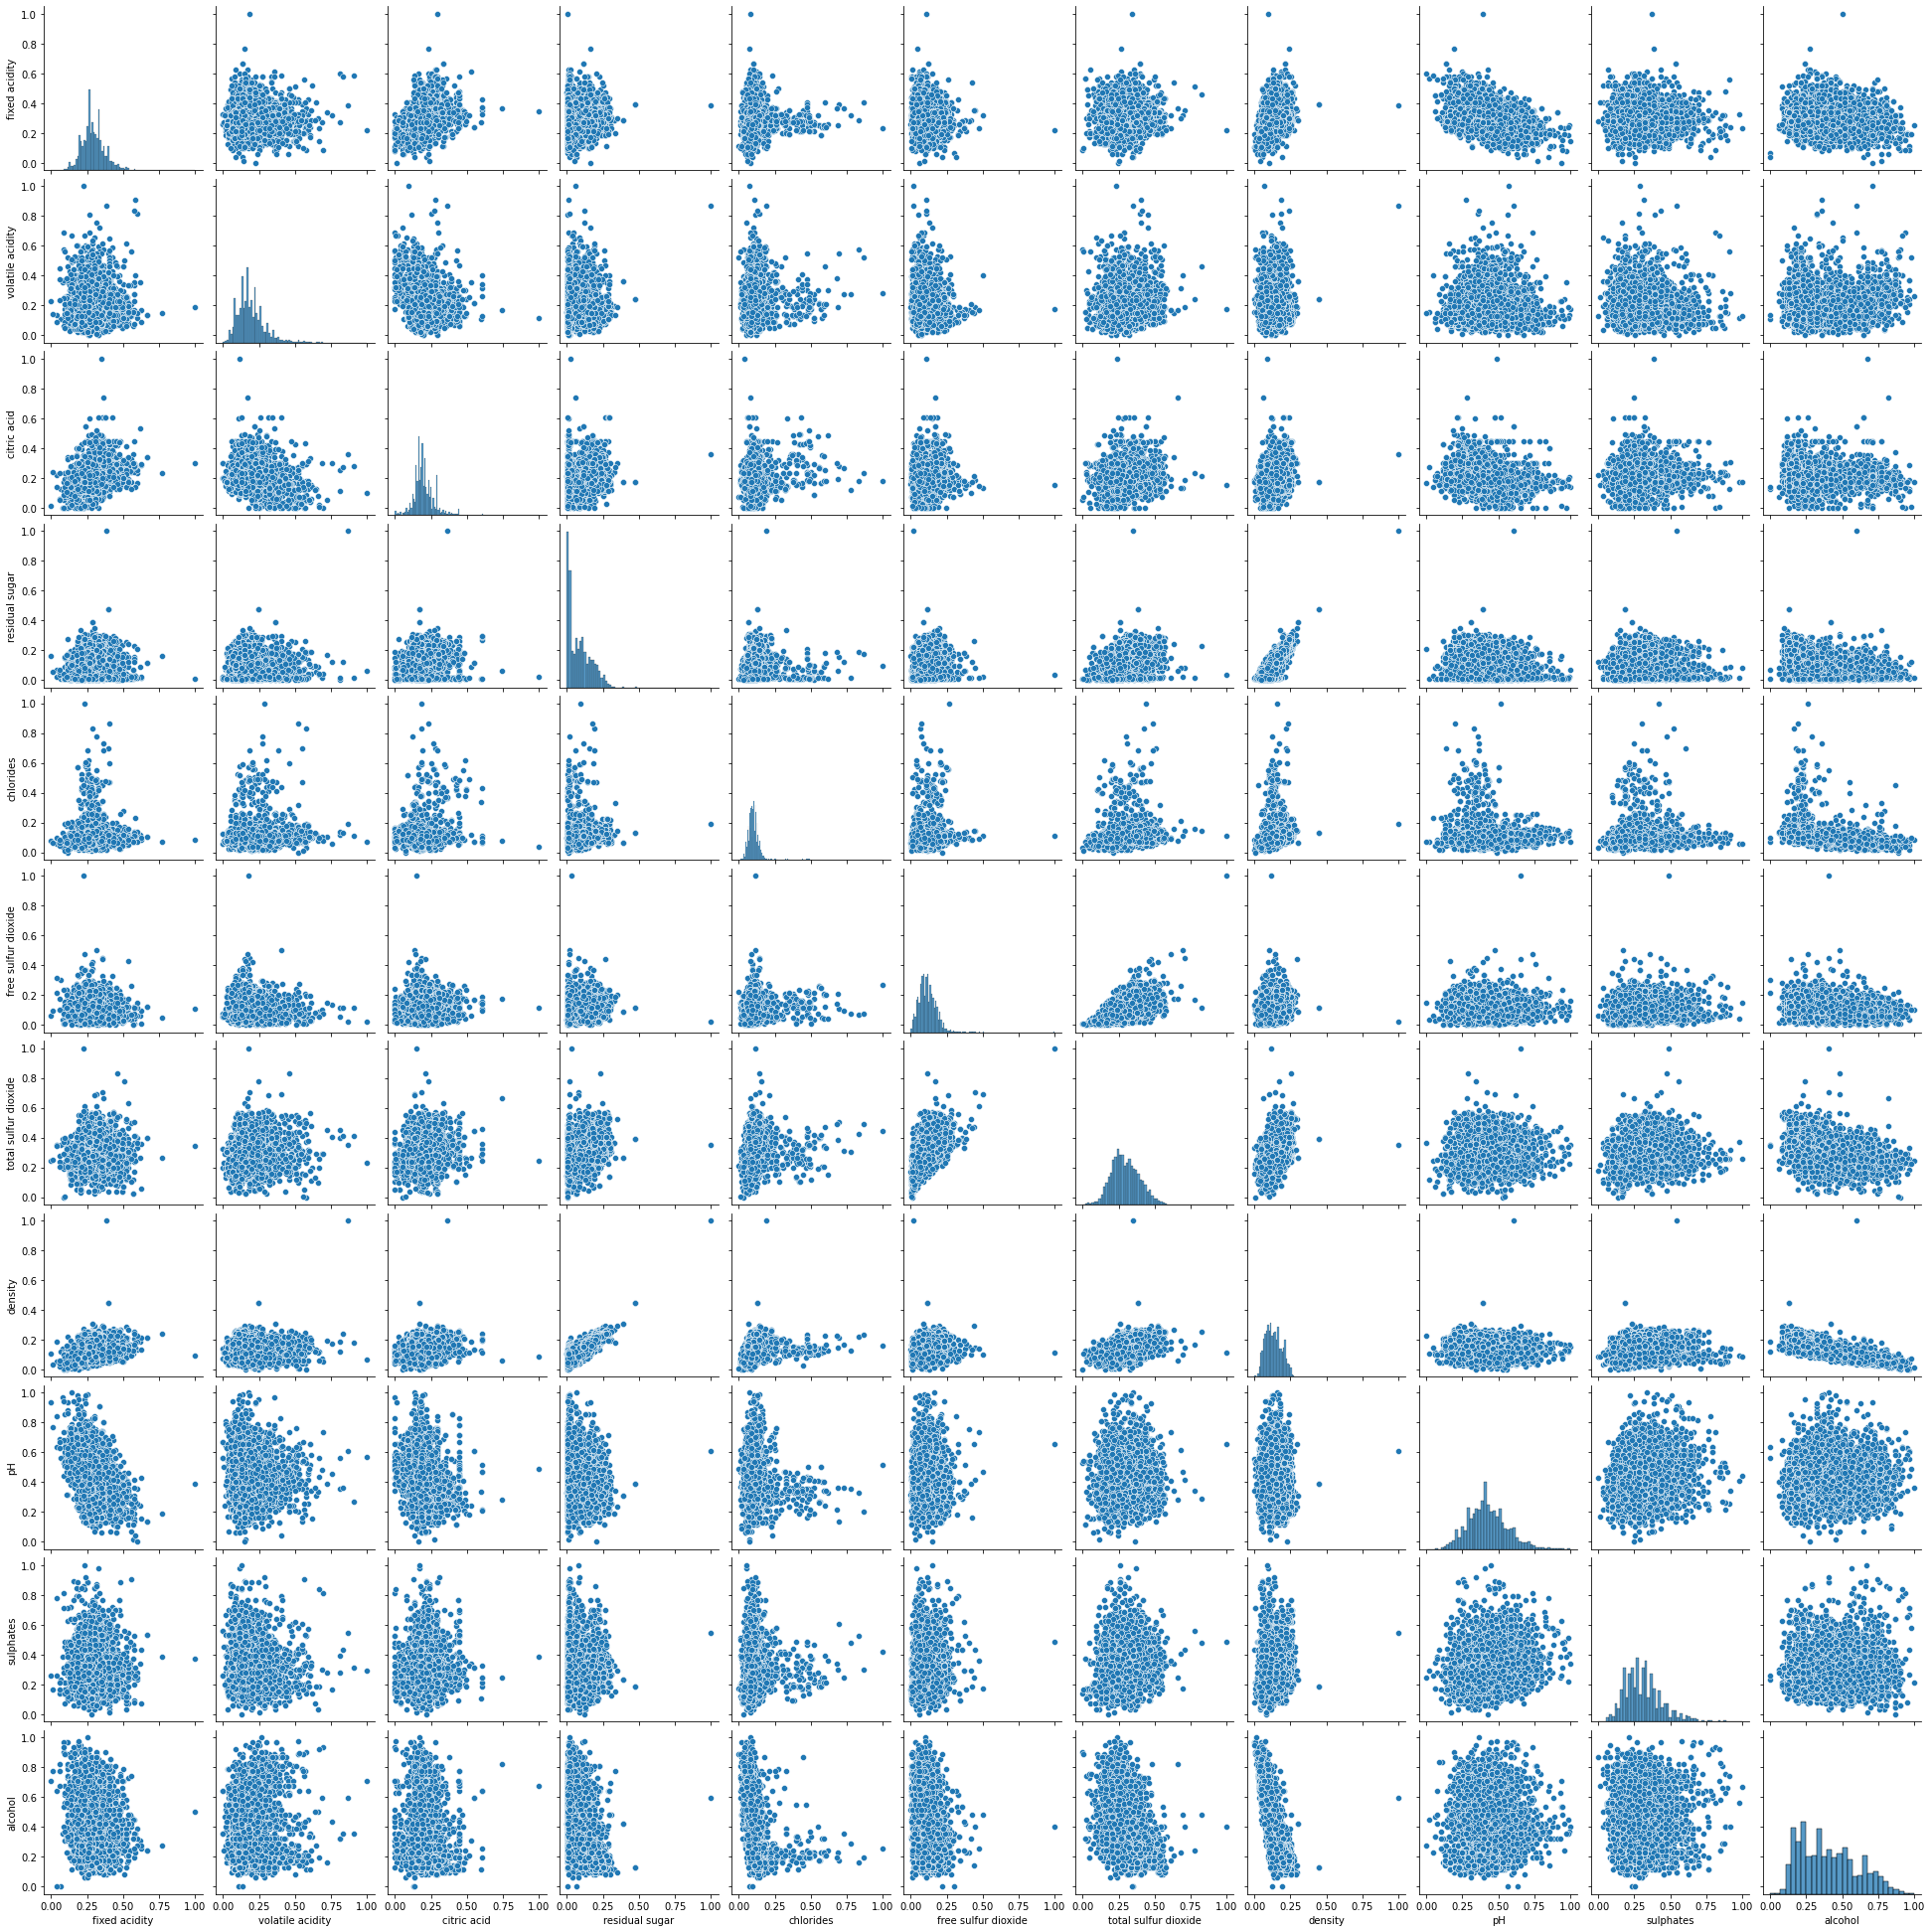

In [42]:
sns.pairplot(df_white.iloc[:,:11])
plt.show()

In [44]:
import numpy as np
import statsmodels.api as sm
x_data = df_white[['fixed acidity', 'volatile acidity', 'residual sugar','free sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
target = df_white[['quality']]

# for b0, 상수항 추가
x_data2 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data2)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/Users/jangjunhyeok/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Fri, 07 Jan 2022   Prob (F-statistic):               0.00
Time:                        18:29:03   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.5398      0.104     53.209      0.000       5.336       5.744
fixed acidity           0.7083      0.212      3.333      0.001       0.292       1.125
volatile acidity       -1.9259      0.112    -17.242      0.000      -2.145      -1.707
residual sugar          5.4016      0.475     11.370      0.000       4.470       6.333
free sulfur dioxide     0.9612      0.194      4.950      0.000       0.580       1.342
density                -8.0031      0.952     -8.411      0.000      -9.868      -6.138
pH                      0.7636      0.114      6.717      0.000       0.541       0.987
sulphates               0.5405      0.086      6.287      0.000       0.372       0.709
alcohol                 1.1976      0.149      8.021      0.000       0.905       1.490
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

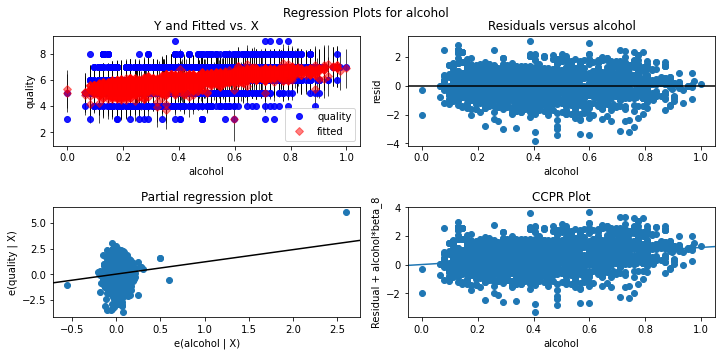

In [45]:
fig = sm.graphics.plot_regress_exog(fitted_multi_model, "alcohol", fig=plt.figure(figsize=(10, 5)))
plt.show()

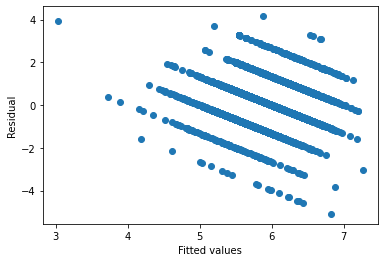

"\nfig = plt.figure(figsize=(8,8))\nfig.set_facecolor('white')\nfont_size = 15\nplt.scatter(df_red['quality'],std_res)\nplt.xlabel('quality', fontsize=font_size)\nplt.ylabel('Residual', fontsize=font_size)\nplt.show()\n"

In [46]:
sqrt_mse = np.sqrt(fitted_multi_model.mse_resid) ## square root of mse
std_res = fitted_multi_model.resid/sqrt_mse ## studentized residual
predicted_val = fitted_multi_model.predict(x_data2)
fig = plt.scatter(predicted_val,std_res)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()
## 잔차도 x축 Lot_size
'''
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
font_size = 15
plt.scatter(df_red['quality'],std_res)
plt.xlabel('quality', fontsize=font_size)
plt.ylabel('Residual', fontsize=font_size)
plt.show()
'''


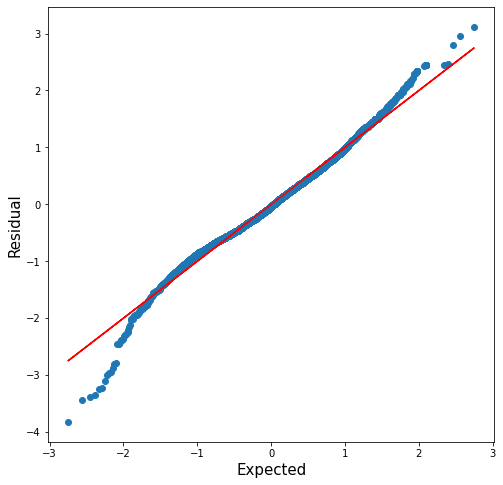

In [47]:
## qq plot
from scipy.stats import norm
sqrt_mse = np.sqrt(fitted_multi_model.mse_resid) ## square root of mse
 
num_const = 0.375 ## 백분위 분자 수정 계수
denom_const = 0.25 ## 백분위 분모 수정계수

## 오름차순으로 정렬했을 때 잔차의 순위
rank = [sorted(fitted_multi_model.resid).index(x)+1 for x in fitted_multi_model.resid] ## 인덱스가 0부터 시작하므로 1을 더한다.
 
expected_value = [] ## 이론적 잔차값
for i in range(len(fitted_multi_model.resid)):
    p = (rank[i]-num_const)/(len(fitted_multi_model.resid)+denom_const) ## 백분위
    expected_value.append(sqrt_mse*norm.ppf(p))
 
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
 
font_size = 15
 
plt.scatter(expected_value,fitted_multi_model.resid) ## 잔차도 출력
plt.plot(expected_value,expected_value,color='red')
plt.xlabel('Expected', fontsize=font_size)
plt.ylabel('Residual', fontsize=font_size)
plt.show()

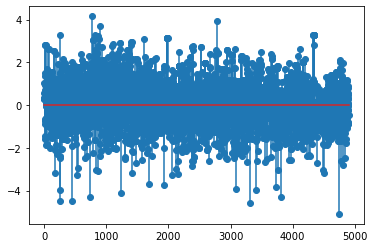

In [48]:
plt.stem(std_res)
plt.show()


In [49]:
import statsmodels
statsmodels.stats.stattools.durbin_watson(std_res, axis=0)

1.6213143706360083